In [1]:
import numpy as np
from scipy import special
import pandas as pd
import matplotlib.pyplot as plt

# Binom Dağılımı

$$P_{N,p} = p^n q^{N-n}\begin{bmatrix}N\\n\end{bmatrix}=p^n q^{N-n}\frac{N!}{(N-n)!n!}$$

>Genelleştirilmiş olasılık formülünün basit bir uygulaması olarak birkaç tane yirmi yüzlü _(0'dan 9'a her rakamın iki kere yer aldığı)_ zarın atıldığını düşünelim: Örneğin böyle 3 zarı attığımız zaman, iki 7 elde etme olasılığı nedir? Her ayrı olay için p olasılığı 1/10, N = 3 ve n = 2'dir. Buna göre olasılık 0.027'dir.

In [2]:
p = 1/10
q = 1 - p
N = 3
n = 2
special.comb(N,n)*p**n*q**(N-n)

0.027000000000000007

Binom dağılımda:

$$\bar n = Np\\
\sigma^2 = Npq$$

## Poisson Dağılımı

$a = Np$ ve $N\gg$ ile $p\ll$ olmak üzere:

$$P_a(n) = \frac{a^ne^{-a}}{n!}$$

$$\bar n = a\\
\sigma^2 = a$$

## Deney

>Yirmi yüzlü üç zardan elde edilen sayıları Çizelge 1 ‘e geçirerek 360 rakamlı bir gelişigüzel sayılar çizelgesi kurun.

In [3]:
n_satir = 15
n_sutun = 24
N = n_satir * n_sutun
rakamlar = np.random.randint(0,10,(n_satir,n_sutun))
rakamlar

array([[1, 5, 5, 6, 3, 8, 1, 3, 2, 7, 4, 2, 1, 3, 7, 5, 8, 0, 5, 7, 2, 2,
        4, 4],
       [3, 5, 8, 6, 0, 3, 8, 0, 3, 7, 3, 8, 5, 7, 8, 9, 2, 8, 6, 3, 7, 0,
        7, 5],
       [1, 2, 0, 9, 8, 3, 9, 5, 7, 1, 5, 1, 3, 8, 2, 3, 9, 9, 3, 2, 6, 6,
        7, 9],
       [5, 6, 6, 2, 0, 0, 4, 7, 0, 9, 5, 4, 7, 3, 7, 3, 4, 7, 3, 6, 5, 7,
        8, 6],
       [1, 7, 8, 7, 4, 3, 4, 0, 5, 8, 2, 0, 6, 2, 0, 9, 7, 3, 4, 3, 9, 3,
        0, 3],
       [0, 1, 6, 1, 5, 8, 3, 5, 4, 7, 8, 4, 8, 8, 7, 1, 2, 8, 1, 9, 6, 4,
        5, 0],
       [7, 8, 2, 4, 1, 0, 5, 7, 1, 8, 4, 3, 2, 6, 0, 5, 6, 2, 3, 5, 3, 4,
        6, 2],
       [5, 0, 2, 5, 7, 8, 5, 6, 5, 7, 1, 7, 0, 2, 3, 2, 9, 5, 9, 3, 6, 3,
        9, 8],
       [7, 6, 9, 5, 6, 6, 0, 3, 4, 2, 4, 1, 0, 3, 9, 5, 2, 5, 0, 7, 0, 1,
        8, 0],
       [4, 5, 2, 8, 6, 9, 3, 6, 9, 5, 9, 8, 2, 9, 1, 3, 2, 9, 6, 8, 2, 2,
        6, 9],
       [6, 6, 2, 2, 0, 4, 0, 7, 6, 4, 9, 0, 7, 5, 8, 5, 2, 6, 8, 8, 5, 1,
        2, 1],
       [4, 0, 6, 9, 5

### Çizelge 1 (Olasılık Dağılımı Deneyi)

In [4]:
for i in range(n_satir):
    print("| ",end="")
    for j in range(n_sutun):
        print("{:d}".format(rakamlar[i,j]),end=" ")
        if((j+1)%3==0):
            print("|",end=" ")
    if((i+1)%3 == 0):
        print("")
        print("-"*(n_sutun*2+(int)(n_sutun/2)+5))
    else:
        print("")
    

| 1 5 5 | 6 3 8 | 1 3 2 | 7 4 2 | 1 3 7 | 5 8 0 | 5 7 2 | 2 4 4 | 
| 3 5 8 | 6 0 3 | 8 0 3 | 7 3 8 | 5 7 8 | 9 2 8 | 6 3 7 | 0 7 5 | 
| 1 2 0 | 9 8 3 | 9 5 7 | 1 5 1 | 3 8 2 | 3 9 9 | 3 2 6 | 6 7 9 | 
-----------------------------------------------------------------
| 5 6 6 | 2 0 0 | 4 7 0 | 9 5 4 | 7 3 7 | 3 4 7 | 3 6 5 | 7 8 6 | 
| 1 7 8 | 7 4 3 | 4 0 5 | 8 2 0 | 6 2 0 | 9 7 3 | 4 3 9 | 3 0 3 | 
| 0 1 6 | 1 5 8 | 3 5 4 | 7 8 4 | 8 8 7 | 1 2 8 | 1 9 6 | 4 5 0 | 
-----------------------------------------------------------------
| 7 8 2 | 4 1 0 | 5 7 1 | 8 4 3 | 2 6 0 | 5 6 2 | 3 5 3 | 4 6 2 | 
| 5 0 2 | 5 7 8 | 5 6 5 | 7 1 7 | 0 2 3 | 2 9 5 | 9 3 6 | 3 9 8 | 
| 7 6 9 | 5 6 6 | 0 3 4 | 2 4 1 | 0 3 9 | 5 2 5 | 0 7 0 | 1 8 0 | 
-----------------------------------------------------------------
| 4 5 2 | 8 6 9 | 3 6 9 | 5 9 8 | 2 9 1 | 3 2 9 | 6 8 2 | 2 6 9 | 
| 6 6 2 | 2 0 4 | 0 7 6 | 4 9 0 | 7 5 8 | 5 2 6 | 8 8 5 | 1 2 1 | 
| 4 0 6 | 9 5 5 | 4 8 4 | 4 2 3 | 8 5 7 | 2 1 7 | 8 9 8 | 9 6 8 |

### Çizelge 2A (Olasılık Dağılımı Deneyi)

In [5]:
print("{:^6s} {:^8s} {:^10s}".format("Sayı","Frekans","Olasılık"))
print("-"*25)
for i in range(10):
    toplam = np.sum(i==rakamlar)
    print("{:^6d} {:^8d} {:^10.5f}".format(i,toplam,toplam/(n_satir*n_sutun)))

 Sayı  Frekans   Olasılık 
-------------------------
  0       37     0.10278  
  1       29     0.08056  
  2       42     0.11667  
  3       38     0.10556  
  4       28     0.07778  
  5       39     0.10833  
  6       42     0.11667  
  7       35     0.09722  
  8       41     0.11389  
  9       29     0.08056  


In [6]:
# Hazır fonksiyonlar kullanarak
ortalama = rakamlar.mean()
varyans = rakamlar.var()

print("Ortalama: {:.4f}".format(ortalama))
print("Varyans : {:.4f}".format(varyans))

Ortalama: 4.5000
Varyans : 7.9778


In [7]:
# Formül kullanarak
rakamlar_tum = rakamlar.flatten()
toplam_aux = 0
for n_i in rakamlar_tum:
    toplam_aux += n_i
ortalama_formul = toplam_aux / N

varyans_aux = 0
for n_i in rakamlar_tum:
    varyans_aux += (n_i - ortalama_formul)**2
varyans_formul = varyans_aux / N

print("Ortalama: {:.4f} (formul)".format(ortalama_formul))
print("Varyans : {:.4f} (formul)".format(varyans_formul))

Ortalama: 4.5000 (formul)
Varyans : 7.9778 (formul)


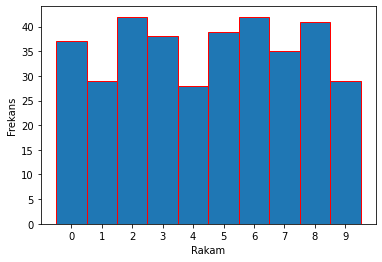

In [8]:
plt.hist(rakamlar_tum,bins=np.arange(11),edgecolor="red")
plt.xticks(np.arange(10)+0.5,range(10)) # x değerleri tam ortada çıksın diye
                                        # yarım birim sağa öteliyoruz
plt.xlabel("Rakam")
plt.ylabel("Frekans")
plt.show()

# Deney

>1. Deney 4 için hazırlanan gelişigüzel sayılar çizelgesi binom ve Poisson dağılımları için
ilginç örnekler verir. Yirmi yüzlü zar ile elde edilen üç-rakamlı gelişigüzel sayıları alarak her üç gruptaki 7'lerin sayısı için bir frekans sayımı yapın. Yani, üç rakamlı sayılardan kaç tanesinde hiç 7 yoktur; bir tane 7, iki 7 veya üç 7 kaç tanesinde var? Sonuçlarınızı ana binom dağılımına göre beklediklerinizle karşılaştırın. Örnek ortalamasını ve variansı hesaplayıp ana binom dağılımındaki değerlerle karşılaştırın.

In [9]:
sayilar = rakamlar_tum.reshape((int)(N/3),3)
sayilar[:10,:]

array([[1, 5, 5],
       [6, 3, 8],
       [1, 3, 2],
       [7, 4, 2],
       [1, 3, 7],
       [5, 8, 0],
       [5, 7, 2],
       [2, 4, 4],
       [3, 5, 8],
       [6, 0, 3]])

In [10]:
k = 7
sayi =  sayilar[4,:]
sayi_str = "".join(sayi.astype("str"))
print("{:3s} sayısındaki {:d} adedi: {:d}".format(sayi_str,k,np.sum(k==sayi)))

137 sayısındaki 7 adedi: 1


In [11]:
k_toplam = np.zeros(4,int)

for i in range(sayilar.shape[0]):
    sayi =  sayilar[i,:]
    k_toplam[np.sum(k==sayi)] += 1

for i in range(4):
    print("İçinde {:d} tane {:d} olan sayı adedi: {:d}".format(i,k,k_toplam[i]),end="\t")
    print("(Olasılık: {:.5f})".format(k_toplam[i]/sayilar.shape[0]))
    
print("\nToplam sayı adedi: {:d}".format(sayilar.shape[0]))

İçinde 0 tane 7 olan sayı adedi: 88	(Olasılık: 0.73333)
İçinde 1 tane 7 olan sayı adedi: 29	(Olasılık: 0.24167)
İçinde 2 tane 7 olan sayı adedi: 3	(Olasılık: 0.02500)
İçinde 3 tane 7 olan sayı adedi: 0	(Olasılık: 0.00000)

Toplam sayı adedi: 120


## Sonuçların binom dağılımına göre karşılaştırılması

Binom dağılımına göre karşılaştırırken sormamız gereken soru: 

"Rastgele 3 rakam çekilirse, bunların $n$ $(n=0,1,2,3)$ tanesinin 7 olma olasılığı nedir?"

şeklindedir.

In [12]:
N = 3
p = 1/10
q = 1 - p

for n in range(4):
    olasilik_n = special.comb(N,n)*p**n*q**(N-n)
    print("Rastgele çekilen 3 rakamdan {:d} tanesinin {:d} olma ihtimali: {:.5f}"\
         .format(n,k,olasilik_n))
    
    

Rastgele çekilen 3 rakamdan 0 tanesinin 7 olma ihtimali: 0.72900
Rastgele çekilen 3 rakamdan 1 tanesinin 7 olma ihtimali: 0.24300
Rastgele çekilen 3 rakamdan 2 tanesinin 7 olma ihtimali: 0.02700
Rastgele çekilen 3 rakamdan 3 tanesinin 7 olma ihtimali: 0.00100


### 9 rakamlı gruplar

>2. Şimdi de gelişigüzel sayılar çizelgesindeki dokuz rakamlı grupları alalım. 9 rakamlı
grupların her birindeki 7'lerin sayısı için frekans sayımı yapın; çizelgede böyle 40 grup bulunmaktadır. Sonuçlarınızı Çizelge 1’ e geçirin.

In [13]:
sayilar_9 = rakamlar.reshape(40,9)
sayilar_9[:10,:]

array([[1, 5, 5, 6, 3, 8, 1, 3, 2],
       [7, 4, 2, 1, 3, 7, 5, 8, 0],
       [5, 7, 2, 2, 4, 4, 3, 5, 8],
       [6, 0, 3, 8, 0, 3, 7, 3, 8],
       [5, 7, 8, 9, 2, 8, 6, 3, 7],
       [0, 7, 5, 1, 2, 0, 9, 8, 3],
       [9, 5, 7, 1, 5, 1, 3, 8, 2],
       [3, 9, 9, 3, 2, 6, 6, 7, 9],
       [5, 6, 6, 2, 0, 0, 4, 7, 0],
       [9, 5, 4, 7, 3, 7, 3, 4, 7]])

In [14]:
# Her bir sayıyı oluşturan rakamlardan kaçar tane
# olduğunu tutan çizelge

# Örneğin cizelge_1_aux.loc[4,6]: 4 indisli sayıda kaç adet 
# 6 olduğunu vermekte

# Benzer şekilde, cizelge_1_aux.loc[6,0]: 6 indisli sayıda 
# kaç adet 0 olduğunu vermekte

sayilar_9_adedi = sayilar_9.shape[0]
cizelge_1_aux_np = np.zeros((sayilar_9_adedi,10),int)
for i in range(sayilar_9_adedi):
    for rakam in range(10):
        cizelge_1_aux_np[i,rakam] = np.sum(rakam==sayilar_9[i,:])
        
cizelge_1_aux = pd.DataFrame(cizelge_1_aux_np)
cizelge_1_aux.index.names=["Sayı"]
cizelge_1_aux.loc[:10,:]

,0,1,2,3,4,5,6,7,8,9
Sayı,,,,,,,,,,
0,0,2,1,2,0,2,1,0,1,0
1,1,1,1,1,1,1,0,2,1,0
2,0,0,2,1,2,2,0,1,1,0
3,2,0,0,3,0,0,1,1,2,0
4,0,0,1,1,0,1,1,2,2,1
5,2,1,1,1,0,1,0,1,1,1
6,0,2,1,1,0,2,0,1,1,1
7,0,0,1,2,0,0,2,1,0,3
8,3,0,1,0,1,1,2,1,0,0


In [15]:
# Bu da hangi rakamın bir sayıda kaç kere çıkmış
# olduğunu tutan çizelge (Çizelge 1)

# Örneğin cizelge_1.loc[4,6]: 4 rakamının kaç tane sayıda
# 6 kere olduğunu vermekte;

# Benzer şekilde, cizelge_1.loc[6,0]: 6 rakamını 
# hiç içermeyen kaç tane sayı olduğunu vermekte

cizelge_1_np = np.zeros((10,10),int)
for rakam in range(10):
    for n in range(10):
        rakamdan_n_tane_var = np.sum(cizelge_1_aux[rakam] == n)
        cizelge_1_np[rakam,n] = rakamdan_n_tane_var
cizelge_1_np

cizelge_1 = pd.DataFrame(cizelge_1_np)
cizelge_1.index.names = ["Rakam"]

In [16]:
# Çizelge 1'in sütunlarını föydeki gibi sıralayalım
# (0 en sonda olacak şekilde)
cizelge_1 = cizelge_1.loc[:,[1,2,3,4,5,6,7,8,9,0]]
cizelge_1

,1,2,3,4,5,6,7,8,9,0
Rakam,,,,,,,,,,
0,11,7,4,0,0,0,0,0,0,18
1,11,9,0,0,0,0,0,0,0,20
2,21,9,1,0,0,0,0,0,0,9
3,19,8,1,0,0,0,0,0,0,12
4,11,7,1,0,0,0,0,0,0,21
5,19,7,2,0,0,0,0,0,0,12
6,16,6,2,2,0,0,0,0,0,14
7,17,6,2,0,0,0,0,0,0,15
8,20,6,3,0,0,0,0,0,0,11


>Son olarak, olasılıkları elde etmek için bunları toplam ölçme sayısına bölün

In [17]:
cizelge_1_olasiliklar = cizelge_1/40
cizelge_1_olasiliklar

,1,2,3,4,5,6,7,8,9,0
Rakam,,,,,,,,,,
0,0.275,0.175,0.100,0.00,0.0,0.0,0.0,0.0,0.0,0.450
1,0.275,0.225,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.500
2,0.525,0.225,0.025,0.00,0.0,0.0,0.0,0.0,0.0,0.225
3,0.475,0.200,0.025,0.00,0.0,0.0,0.0,0.0,0.0,0.300
4,0.275,0.175,0.025,0.00,0.0,0.0,0.0,0.0,0.0,0.525
5,0.475,0.175,0.050,0.00,0.0,0.0,0.0,0.0,0.0,0.300
6,0.400,0.150,0.050,0.05,0.0,0.0,0.0,0.0,0.0,0.350
7,0.425,0.150,0.050,0.00,0.0,0.0,0.0,0.0,0.0,0.375
8,0.500,0.150,0.075,0.00,0.0,0.0,0.0,0.0,0.0,0.275


In [18]:
# Her rakamın olasılığı üzerinden
# (yani sütunlar boyunca) ortalama
# değerlerini alalım
cizelge_1_olasiliklar_ortalama = cizelge_1_olasiliklar.mean()

cizelge_1_olasiliklar_ortalama

1    0.395
2    0.175
3    0.045
4    0.005
5    0.000
6    0.000
7    0.000
8    0.000
9    0.000
0    0.380
dtype: float64

>Sonuçlarınızı $P_{N,1/10} (n)$ binom dağılımı değerleriyle karşılaştırın.

In [19]:
N = 9
p = 1/10
q = 1-p

print("Seçilen bir rakamın 9 rakamlı bir sayıda:\n")
for n in range(10):
    olasilik_n_binom = special.comb(N,n)*p**n*q**(N-n)
    print( "\t{:d} kere çıkma ihtimali: {:.9f}"\
         .format(n,olasilik_n_binom))

Seçilen bir rakamın 9 rakamlı bir sayıda:

	0 kere çıkma ihtimali: 0.387420489
	1 kere çıkma ihtimali: 0.387420489
	2 kere çıkma ihtimali: 0.172186884
	3 kere çıkma ihtimali: 0.044641044
	4 kere çıkma ihtimali: 0.007440174
	5 kere çıkma ihtimali: 0.000826686
	6 kere çıkma ihtimali: 0.000061236
	7 kere çıkma ihtimali: 0.000002916
	8 kere çıkma ihtimali: 0.000000081
	9 kere çıkma ihtimali: 0.000000001


>Bu dağılımın değerlerini hesaplarken P(n+1)'i P(n) cinsinden veren bir geri götürme (özyineleme / _recurrence_) bağıntısı kullanmak fazla işlem yapmayı engeller.
>
>Binom dağlımı için uygun olan geri götürme bağıntısı (...) aşağıdaki bağıntıdır.
>
>$$P_{N,p}(N+1)=\frac{p(N-n)}{q(n+1)}P_{N,p}(n)$$
>
>Buna göre sadece $P_{N,p}(0)$'ı hesaplamak ve bu bağıntıyı kullanmak yeterlidir. Geri götürme bağıntısını kullanırken başta yapılan bir hata süregideceğinden genel olarak bu yol biraz sakıncalıdır. Bununla birlikte bu özel durumda artan n'ler için P’nin değerleri çok çabuk küçüldüğünden bir sakınca yoktur. Gerçekten, $n\gt4$ için değerlerin $10^{-5}$'ten küçük olduğunu, böylece daha ileri gitmenin anlamsızlığını görmelisiniz.

In [20]:
N = 9
p = 1/10
q = 1-p

print("Seçilen bir rakamın 9 rakamlı bir sayıda n kere çıkma ihtimali:\n")

print("{:^4s} {:^11s} | {:^11s} | {:^11s}"\
      .format("n","Binom","Özyineleme","Örnek"))
print("-"*44)
n = 0
olasilik_n_binom = special.comb(N,n)*p**n*q**(N-n)
P_Np_n = olasilik_n_binom
print("{:^4d} {:.9f} | {:11s} | {:.9f}"\
         .format(n,olasilik_n_binom,"",cizelge_1_olasiliklar_ortalama.loc[n]))

for n in range(1,10):
    olasilik_n_binom = special.comb(N,n)*p**n*q**(N-n)
    olasilik_n_ozyineleme = p * (N-(n-1)) / (q*((n-1)+1))*P_Np_n
    print("{:^4d} {:.9f} | {:.9f} | {:.9f}"\
         .format(n,olasilik_n_binom,olasilik_n_ozyineleme,\
                 cizelge_1_olasiliklar_ortalama.loc[n]))
    P_Np_n = olasilik_n_ozyineleme

Seçilen bir rakamın 9 rakamlı bir sayıda n kere çıkma ihtimali:

 n      Binom    | Özyineleme  |    Örnek   
--------------------------------------------
 0   0.387420489 |             | 0.380000000
 1   0.387420489 | 0.387420489 | 0.395000000
 2   0.172186884 | 0.172186884 | 0.175000000
 3   0.044641044 | 0.044641044 | 0.045000000
 4   0.007440174 | 0.007440174 | 0.005000000
 5   0.000826686 | 0.000826686 | 0.000000000
 6   0.000061236 | 0.000061236 | 0.000000000
 7   0.000002916 | 0.000002916 | 0.000000000
 8   0.000000081 | 0.000000081 | 0.000000000
 9   0.000000001 | 0.000000001 | 0.000000000


>3. Şimdi 9 rakamlı gelişigüzel sayı gruplarındaki sayıların dağılımı için Poisson yaklaşıklığını ele alalım. $N = 9$, $p = 1/10$ olup $a = Np = 0,9$'dur. Poisson dağılımını kullanarak $n$'nin 0'dan 9'a kadar olan değerleri için olasılıkları yeniden hesaplayın. Hiç kuşkusuz $N = 9$, $N = \infty$'dan çok uzak olduğundan kesin bir uyuşma beklememeliyiz, fakat yine de karşılaştırma ilgi çekicidir.

In [21]:
N = 9
p = 1/10
a = N*p

for n in range(10):
    poisson = a**n*np.exp(-a) / special.factorial(n)
    print(n,poisson)

0

 0.4065696597405991
1 0.36591269376653923
2 0.16466071219494266
3 0.0493982136584828
4 0.011114598073158628
5 0.002000627653168553
6 0.000300094147975283
7 3.858353331110782e-05
8 4.340647497499629e-06
9 4.3406474974996295e-07


In [22]:
N = 9
p = 1/10
q = 1-p

print("Seçilen bir rakamın 9 rakamlı bir sayıda n kere çıkma ihtimali:\n")

print("{:^4s} {:^11s} | {:^11s} | {:^11s}"\
      .format("n","Binom","Örnek","Poisson"))
print("-"*44)

dizi_binom = []
dizi_ornek = []
dizi_poisson = []

for n in range(0,10):
    olasilik_n_binom = special.comb(N,n)*p**n*q**(N-n)
    poisson = a**n*np.exp(-a) / special.factorial(n)
    print("{:^4d} {:.9f} | {:.9f} | {:.9f}"\
         .format(n,olasilik_n_binom,\
                 cizelge_1_olasiliklar_ortalama.loc[n],poisson))
    dizi_binom.append(olasilik_n_binom)
    dizi_ornek.append(cizelge_1_olasiliklar_ortalama.loc[n])
    dizi_poisson.append(poisson)

Seçilen bir rakamın 9 rakamlı bir sayıda n kere çıkma ihtimali:

 n      Binom    |    Örnek    |   Poisson  
--------------------------------------------
 0   0.387420489 | 0.380000000 | 0.406569660
 1   0.387420489 | 0.395000000 | 0.365912694
 2   0.172186884 | 0.175000000 | 0.164660712
 3   0.044641044 | 0.045000000 | 0.049398214
 4   0.007440174 | 0.005000000 | 0.011114598
 5   0.000826686 | 0.000000000 | 0.002000628
 6   0.000061236 | 0.000000000 | 0.000300094
 7   0.000002916 | 0.000000000 | 0.000038584
 8   0.000000081 | 0.000000000 | 0.000004341
 9   0.000000001 | 0.000000000 | 0.000000434


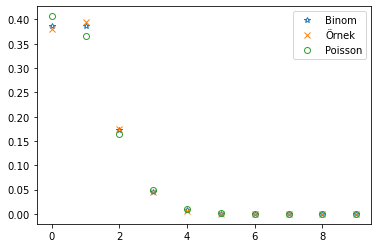

In [23]:
n = range(10)
plt.plot(n,dizi_binom,"*",markerfacecolor="none")
plt.plot(n,dizi_ornek,"x")
plt.plot(n,dizi_poisson,"o",markerfacecolor="none")
plt.legend(["Binom","Örnek","Poisson"])
plt.show()